In [90]:
# Julia set

In [38]:
import numpy as np, matplotlib.pyplot as plt

# Initial values
xrange = [-1.5, 1.5]
yrange = [-1.5, 1.5]
n = 500   
zmax = 1000
itmax = 20

# Find absolute value of complex number
def absCom(z):
    return np.sqrt((z.real**2) + (z.imag**2))

# Determines whether a z value is in the Julia set
# Returns the number of iterations before z exceed xmax
# If iterations reaches 100, z is in the set, otherwise z is not in the set
def isInSet(z, c):
    belowMax = True
    it = 0
    
    while belowMax and it < itmax:
        z = (z**2) + c
        belowMax = absCom(z) < zmax
        it += 1

    return it

In [39]:
xpoints = np.zeros(n**2)
ypoints = np.zeros(n**2) 

# Create lines along x and y axes
# These are the dimensions of the rectangular region to examine
dx = np.linspace(xrange[0], xrange[1], n)
dy = np.linspace(yrange[0], yrange[1], n)

# Create evenly spaced points across surface of rectangular region to test
for i in range (0, n):
    for j in range (0, n):
        xpoints[n*i + j] = dx[i]
        ypoints[n*i + j] = dy[j]

In [40]:
# Set each element in julia list to the number of iterations
# tested to determine if value from x and y points, sharing indices
def generateJulia(c):
    julia = np.zeros(n**2)

    for i in range(0, n**2):
        z = complex(xpoints[i], ypoints[i])
        julia[i] = isInSet(z, c)

    return julia

# Plot results
def plotJulia(c):
    for i in range (0, n**2):
        if julia[i] == 100:
            plt.plot(xpoints[i], ypoints[i], marker='o', c='black')
        elif julia[i] > 6:
            plt.plot(xpoints[i], ypoints[i], marker='o', c='red')
        elif julia[i] <= 6 and julia[i] > 4:
            plt.plot(xpoints[i], ypoints[i], marker='o', c='orange')
        elif julia[i] == 4:
            plt.plot(xpoints[i], ypoints[i], marker='o', c='yellow')
        elif julia[i] == 3:
            plt.plot(xpoints[i], ypoints[i], marker='o', c='green')
        elif julia[i] == 2:
            plt.plot(xpoints[i], ypoints[i], marker='o', c='blue')
        elif julia[i] == 1:
            plt.plot(xpoints[i], ypoints[i], marker='o', c='black')

    plt.xlabel("a")
    plt.ylabel("bi")
    title = "Julia Set for c = " + str(c.real) + " + " + str(c.imag) + "i"
    plt.title(title)
    plt.show()

def plotJulia2(c):
    h = plt.contourf(dx, dy, julia2d)
    plt.colorbar()
    plt.show()

TypeError: Input z must be 2D, not 1D

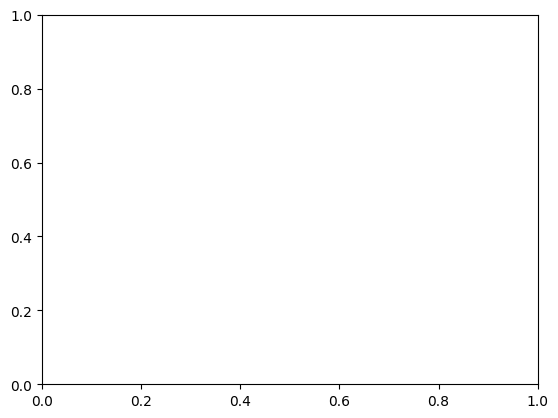

In [4]:
c = complex(0,0)
julia = generateJulia(c)
plotJulia2(c)

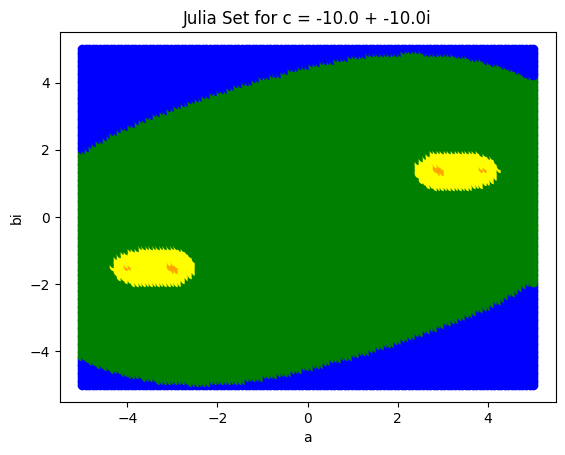

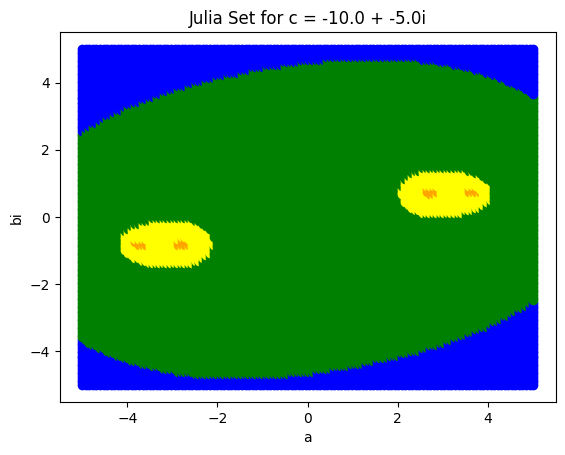

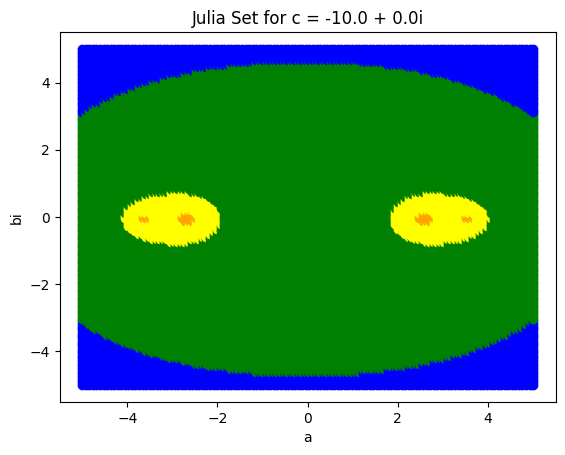

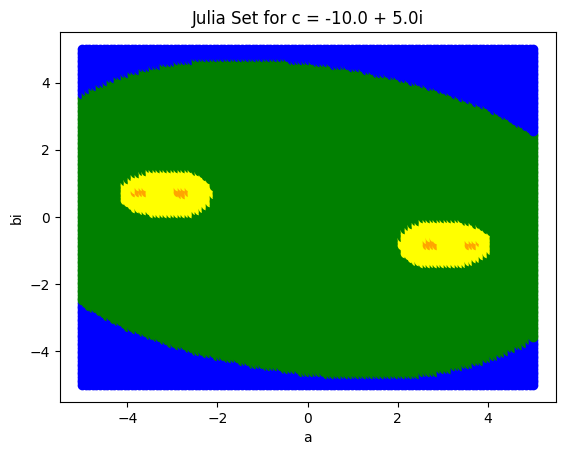

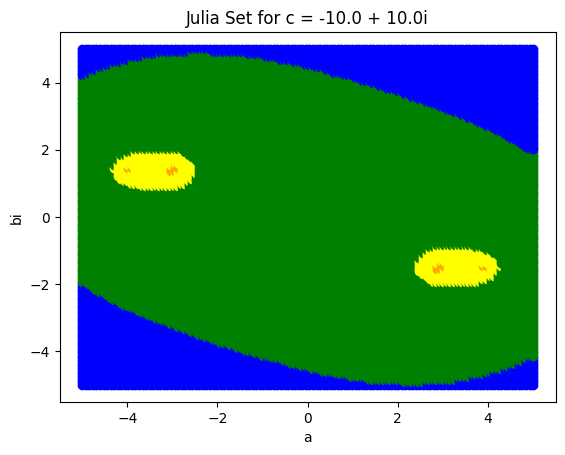

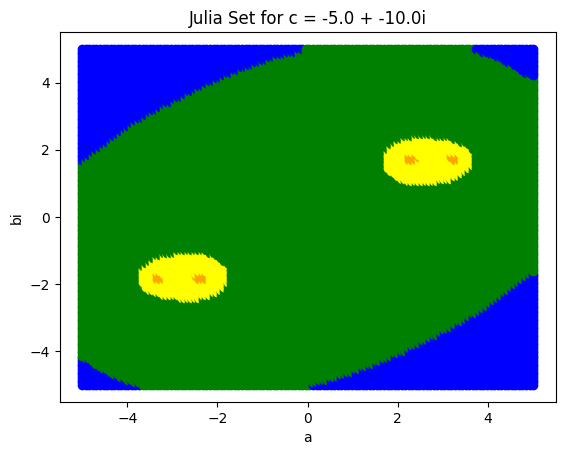

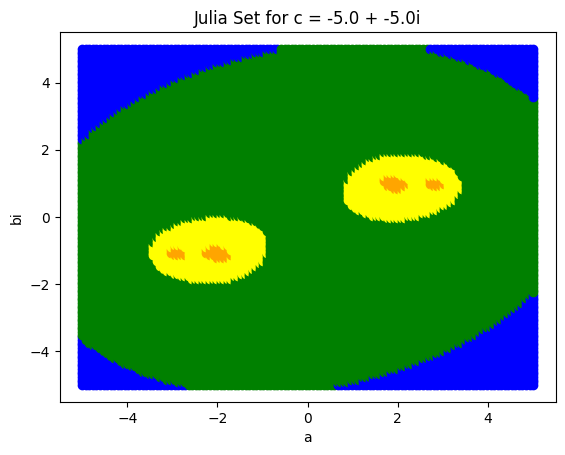

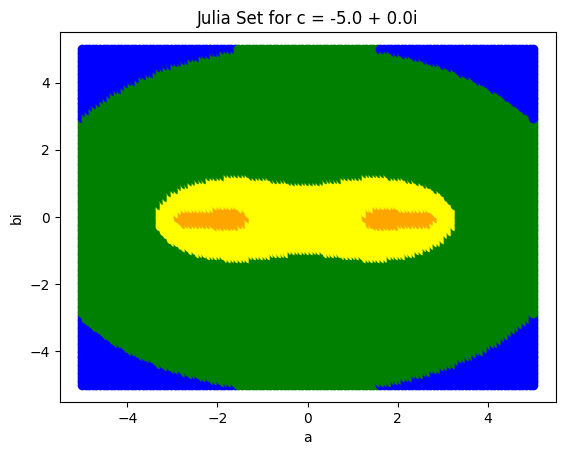

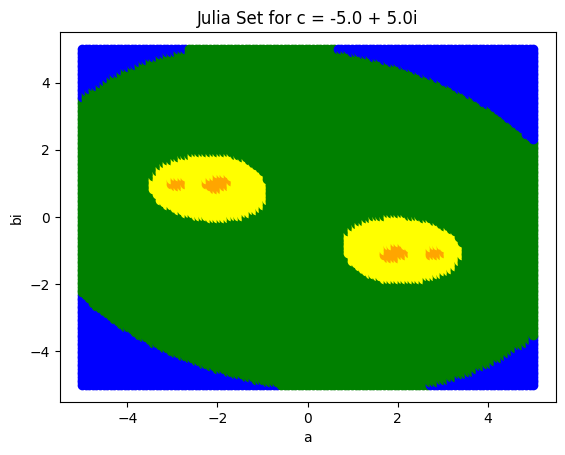

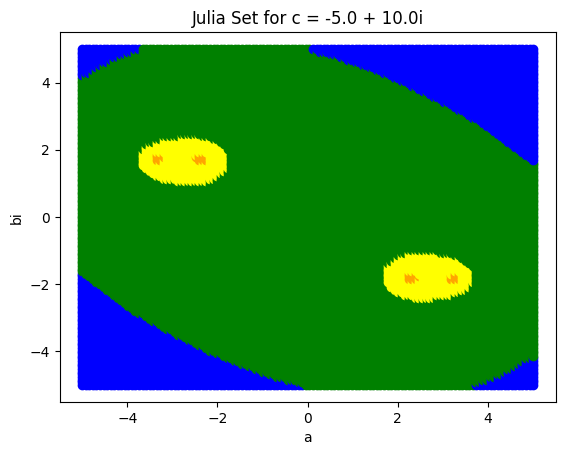

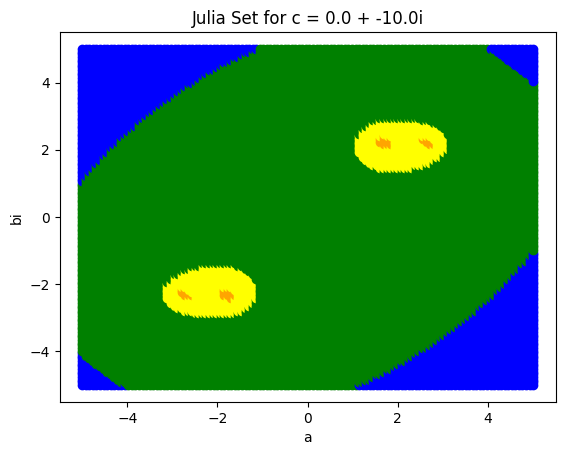

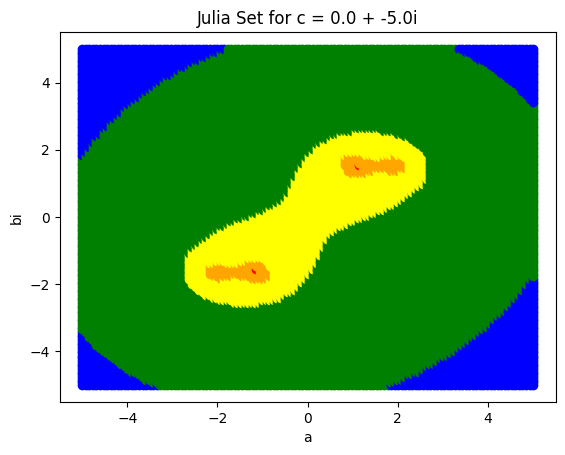

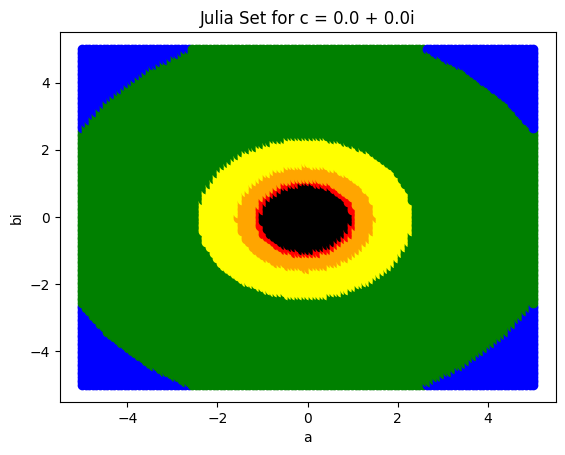

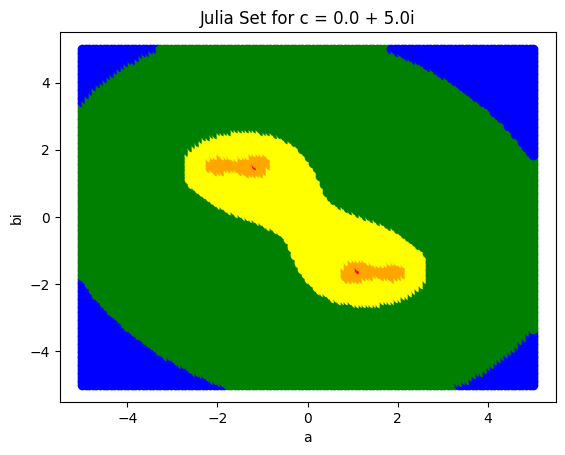

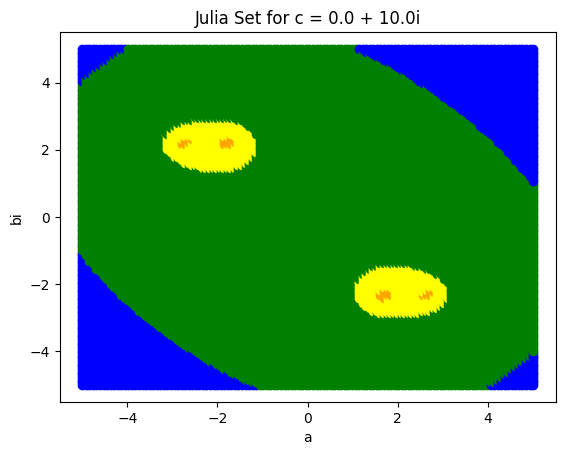

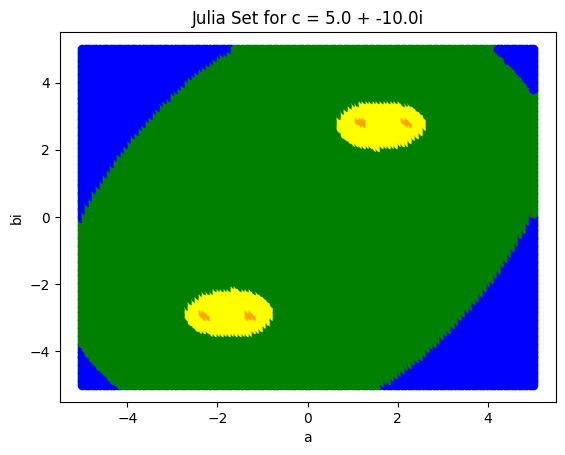

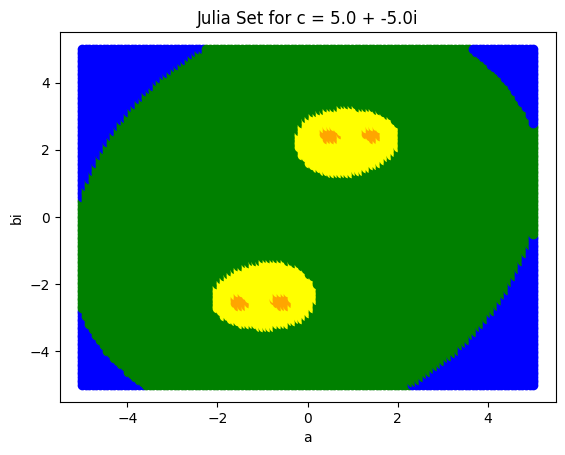

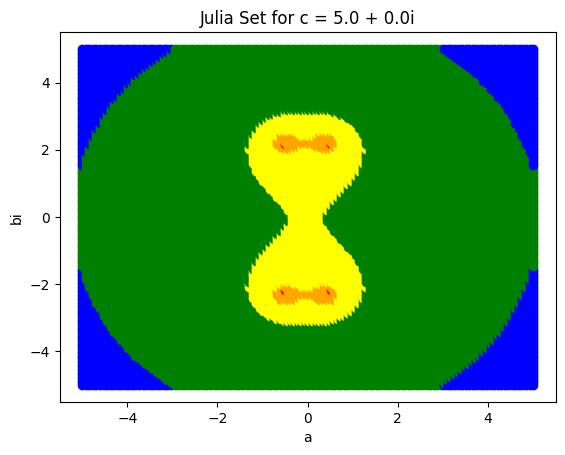

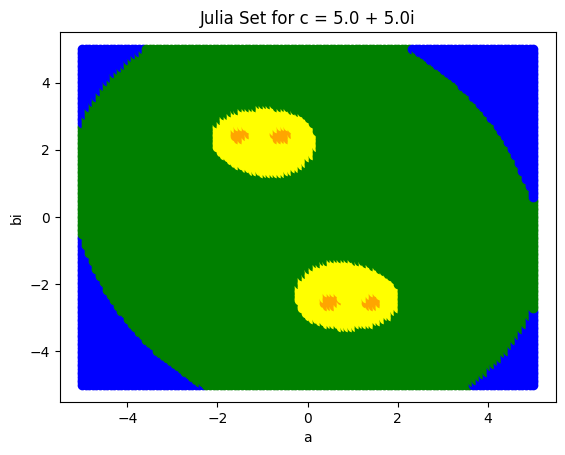

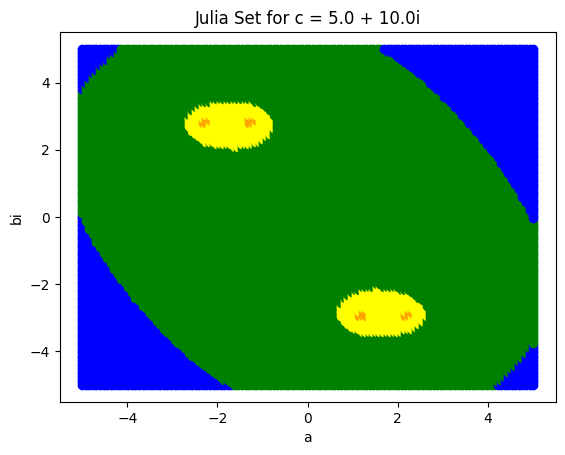

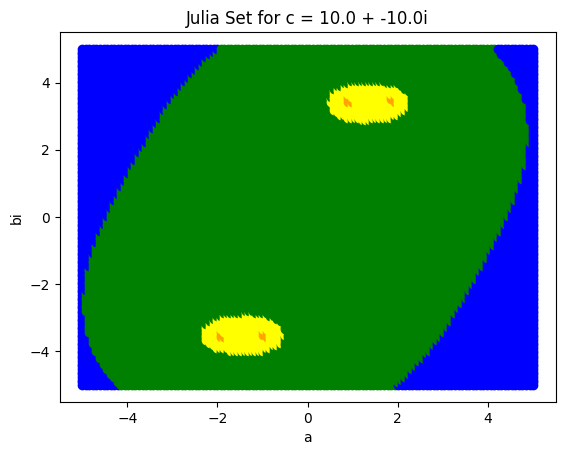

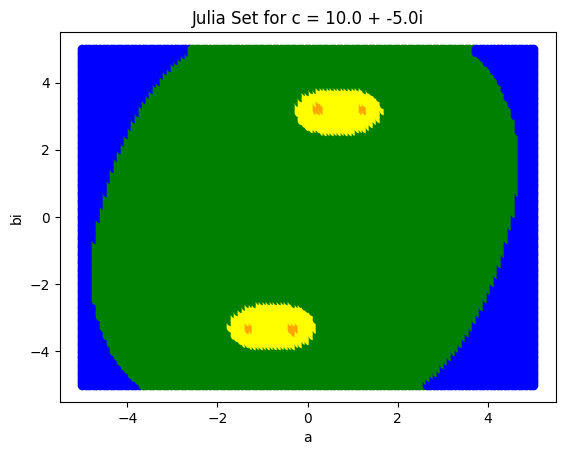

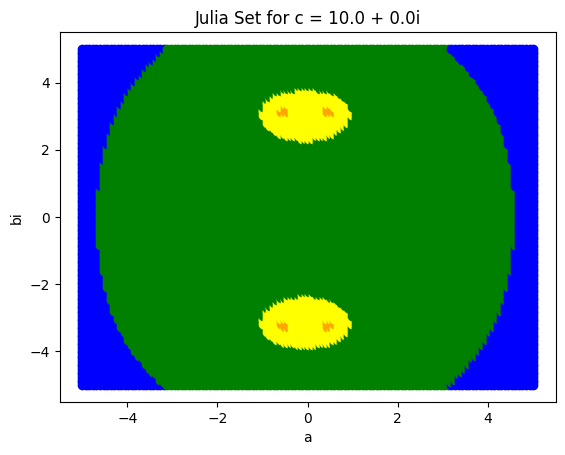

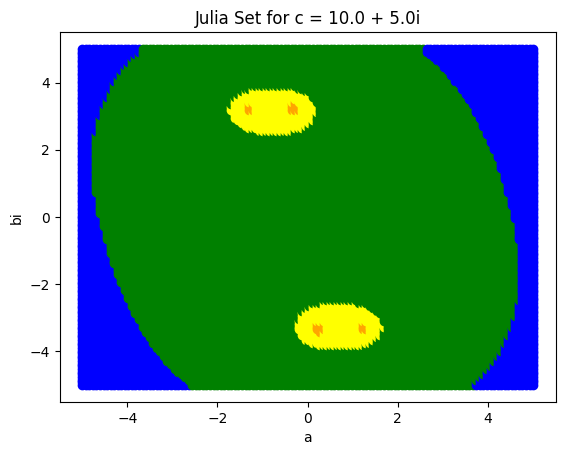

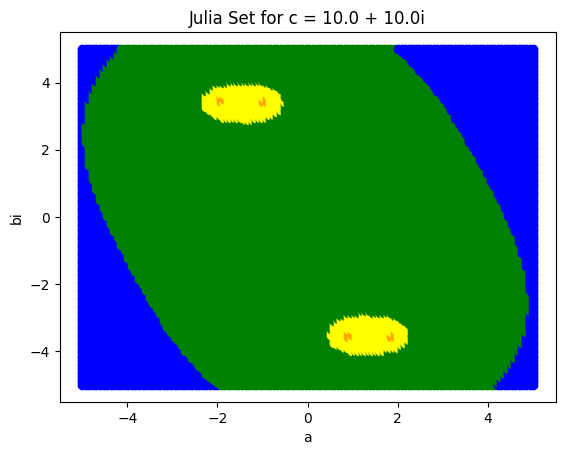

In [94]:
xc = np.linspace(-10, 10, 5)
yc = np.linspace(-10, 10, 5)

for i in range(0, len(xc)):
    for j in range(0, len(yc)):
        c = complex(xc[i],yc[j])
        julia = generateJulia(c)
        plotJulia(c)

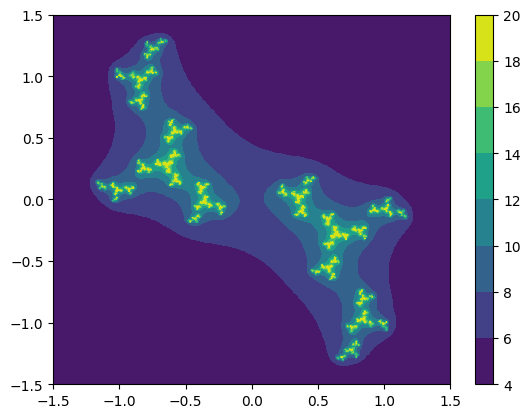

In [41]:
julia2d = np.zeros([n, n])
c = complex(0.05, 1)
julia = generateJulia(c)
k = 0
for i in range (0, n):
    for j in range (0, n):
        julia2d[i, j] = julia[k]
        k += 1
plotJulia2(c)